In [201]:
# Libraries import
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (ConfusionMatrixDisplay, RocCurveDisplay, recall_score, 
                             precision_score, f1_score, roc_curve, roc_auc_score)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

In [3]:
# Data import
df = pd.read_csv('./data/data_cleaned.csv')
df

,subreddit,text
0,office,Friend or just a colleague Hi is it just my co...
1,office,Printer systems Good morning. I'm looking for ...
2,office,What Would You Do? Hello everyone!First time p...
3,office,attention yo! I don't want to go to office for...
4,office,Do you have any office-related wisdom to share...
...,...,...
1781,DunderMifflin,Ryan and Robert California are a fantastic duo
1782,DunderMifflin,What did kreed do
1783,DunderMifflin,"Okay, I’m addicted"
1784,DunderMifflin,That's what she said In the Finale episode of ...


In [4]:
# Baseline accuracy - what if we say that everything is 'DunderMifflin', what would be the percentage of correct predictions?
df.subreddit.value_counts(normalize = True)

DunderMifflin    0.555991
office           0.444009
Name: subreddit, dtype: float64

Baseline accuracy is 56%

In [6]:
# transforming subreddit column into binaries, where 1 = DunderMifflin
df['subreddit'] = df['subreddit'].map({'office': 0, 'DunderMifflin': 1})

In [12]:
# Setting X and y
X = df['text']
y = df['subreddit']

In [13]:
# Splitting data into train and test chunks
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1339,), (447,), (1339,), (447,))

### Multinomial Naive Bayes with Count Vectorizer
Multinomial Naive Bayes is a popular algorithm for documents classification because of its speed and simplicity. One of its real-world applications is gmail, where it's utilized to detect spam.

In [70]:
# Setting up custom stop words list created during preprocessing
common = pd.read_csv('./data/common_words.csv', index_col = 'Unnamed: 0') # data import
common_words = common.index # extracting words

# Adding custom common words to nltk stopwords list
stop_words_custom = stopwords.words('english') 

# saving nltk stop words
nltk_sw = stopwords.words('english')

for word in common_words:
    stop_words_custom.append(word)

In [71]:
# Checking result
len(stop_words_custom)

927

In [16]:
# To figure out the best-working combination of hyperparameters, I'm creating a pipeline of CountVectorizer and MultinomialNB
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [74]:
# Parameters
pipe_params = {
    'cvec__stop_words': [None, # no stop words at all
                         'english', # default CountVectorizer's stop words
                         nltk_sw, # NLTK's stop words which are better than CountVectorizer's in my opinion
                         stop_words_custom], # custom stop words created earlier 
    'cvec__max_features': range(3000, 7000, 1000), # maximum number of top recurrent words
    'cvec__min_df': [2, 3], # minimum of documents where word is present
    'cvec__max_df': [0.9, 0.95], # maximum number of documents, percentage
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)], # individual words, bigrams or trigrams
    'nb__alpha':[0.1, 0.5, 1] # smoothing parameter helping to tune model variance
}

In [75]:
# GridSearchCV to find the most optimal parameters
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params,
                  cv = 5)

In [76]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': range(3000, 7000, 1000),
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cvec__stop_words': [None, 'english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've"...
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', 

In [78]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',

In [77]:
gs.best_score_

0.9073872211973839

Best parameters for Multinomial Naive Bayes model with CountVectorizer are:
* max_df: 0.9
* max_features: 3000
* min_df: 2
* ngram_range: (1, 1)
* stop_words: custom stop words
* alpha: 0.1

In [79]:
# Creating a function querying key model's metrics
# Inspiration: lesson 7.04 on imbalanced data
scores = []
def metrics(model):
    '''
    The metrics function takes model name, generates predictions and returns train and test accuracy scores, 
    '''
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Oranges')
    
    preds = model.predict(X_test)
    
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    recall = recall_score(y_test, preds, pos_label = 1)
    prec = precision_score(y_test, preds, pos_label = 1)
    f1 = f1_score(y_test, preds, pos_label = 1)

    print(f'train: {train}')
    print(f'test: {test}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

    return {
        'train': train,
        'test': test,
        'recall': recall,
        'precision': prec,
        'f1_score': f1
    }

train: 0.9477221807318895
test: 0.9328859060402684
recall: 0.927710843373494
precision: 0.9506172839506173
f1 score: 0.9390243902439024


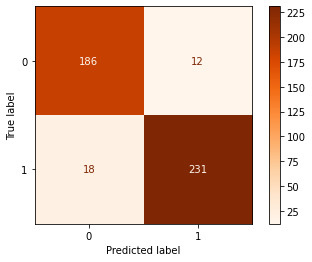

In [185]:
scores.append(metrics(gs))

In [151]:
# Saving model metrics to a dataframe
results = pd.DataFrame(scores)
results

,train,test,recall,precision,f1_score
0,0.947722,0.932886,0.927711,0.950617,0.939024


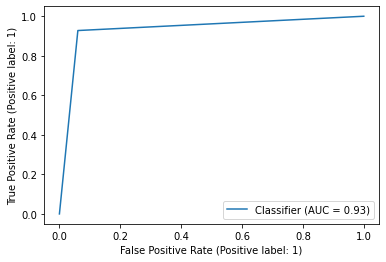

In [83]:
preds = gs.predict(X_test) # generating predictions to plot ROC curve
RocCurveDisplay.from_predictions(y_test, preds);

### Multinomial Naive Bayes with TfidfVectorizer
TfidVectorizer might perform better than Count Vectorizer, because it calculates words frequency relative to all other documents.

In [84]:
# Creating a pipeline
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [141]:
# Which parameters to search for, based on the previous model's best parameters
pipe_tvec_params = {
    'tvec__max_features': range(1000, 4000, 500),
    'tvec__min_df': [2, 3], 
    'tvec__max_df': [0.8, 0.85, 0.9], 
    'tvec__stop_words': [None, 'english', stop_words_custom, nltk_sw],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': [0.1, 0.2, 0.3, 0.4, 0.5] 
}

In [142]:
# GridSearchCV.
gs2 = GridSearchCV(pipe_tvec,
                   param_grid = pipe_tvec_params,
                   cv = 5,
                   n_jobs = -1)

In [143]:
# Fitting train data
gs2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'tvec__max_df': [0.8, 0.85, 0.9],
                         'tvec__max_features': range(1000, 4000, 500),
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', '...
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
   

In [144]:
gs2.best_score_

0.9073872211973839

Best parameters for Multinomial Naive Bayes model with TF-IDF Vectorizer are:
* max_df: 0.8
* max_features: 2000
* min_df: 2
* ngram_range: (1, 1)
* stop_words: custom stop words
* alpha: 0.2

In [146]:
gs2.best_params_

{'nb__alpha': 0.2,
 'tvec__max_df': 0.8,
 'tvec__max_features': 2000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  

train: 0.9529499626587006
test: 0.9351230425055929
recall: 0.9317269076305221
precision: 0.9508196721311475
f1 score: 0.9411764705882353


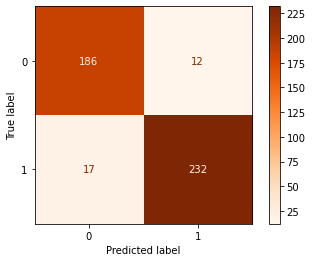

In [187]:
# Saving model perfomance metrics
scores.append(metrics(gs2))

In [188]:
# Updating dataframe with metrics
results = pd.DataFrame(scores, index=['MNB_cvec', 'MNB_tvec'])
results

,train,test,recall,precision,f1_score
MNB_cvec,0.947722,0.932886,0.927711,0.950617,0.939024
MNB_tvec,0.952950,0.935123,0.931727,0.950820,0.941176


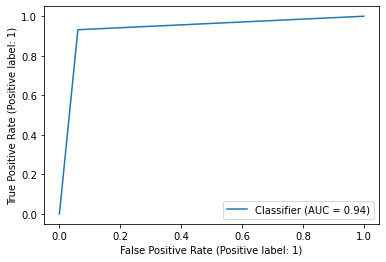

In [155]:
preds2 = gs2.predict(X_test) # generating predictions to plot ROC curve
RocCurveDisplay.from_predictions(y_test, preds2);

So, TF-IDF vectorizer performed a little bit better. Both algorythms try to use as little words as possible, based on parameters like max_df and max_features. Comparing confusion matrixes, I've found an interesting detail: performance improved by properly reclassifying only one post from false negative to true positive.

### kNN and TF-IDF vectorizer
kNN is one of the best performing documents classification models, based on the internet research I did, so I'm giving it a try as well. Since TF-IDF vectorizer performed better than Count Vectorizer, I'm proceeding with it and with some hyperparameters variations based on two previous models.

In [125]:
# Creating pipeline
pipe_knn = Pipeline([
    ('tf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [130]:
# Parameters
pipe_params_knn = {
    'tf__stop_words': [None, 'english', stop_words_custom, nltk_sw],
    'tf__max_features': range(1000, 2000, 200),
    'tf__min_df': [2, 3, 4],
    'tf__max_df': [0.8, 0.85, 0.9],
    'knn__n_neighbors': range(1, 20, 1)
}

In [131]:
# Fitting data
gs_knn = GridSearchCV(pipe_knn,
                      param_grid = pipe_params_knn,
                      cv = 5,
                      n_jobs = -1)

gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 20),
                         'tf__max_df': [0.8, 0.85, 0.9],
                         'tf__max_features': range(1000, 2000, 200),
                         'tf__min_df': [2, 3, 4],
                         'tf__stop_words': [None, 'english',
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you...
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 

Best parameters for KNN with TF-IDF Vectorizer are:
* n_neighbors: 19 
* max_df: 0.8
* max_features: 1800
* min_df: 3
* ngram_range: (1, 1)
* stop_words: None

This time, model preferred no stop words and minimum 3 documents.

In [132]:
gs_knn.best_params_

{'knn__n_neighbors': 19,
 'tf__max_df': 0.8,
 'tf__max_features': 1800,
 'tf__min_df': 3,
 'tf__stop_words': None}

In [133]:
gs_knn.best_score_

0.7438928950751859

train: 0.9305451829723674
test: 0.796420581655481
recall: 0.8755020080321285
precision: 0.7841726618705036
f1 score: 0.8273244781783681


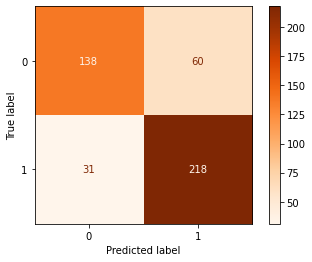

In [189]:
# Saving model perfomance metrics
scores.append(metrics(gs_knn))

In [190]:
# Updating dataframe with metrics
results = pd.DataFrame(scores, index=['MNB_cvec', 'MNB_tvec', 'KNN'])
results

,train,test,recall,precision,f1_score
MNB_cvec,0.947722,0.932886,0.927711,0.950617,0.939024
MNB_tvec,0.952950,0.935123,0.931727,0.950820,0.941176
KNN,0.930545,0.796421,0.875502,0.784173,0.827324


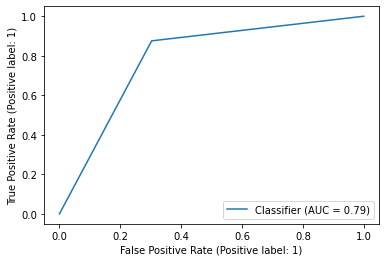

In [195]:
preds3 = gs_knn.predict(X_test) # generating predictions to plot ROC curve
RocCurveDisplay.from_predictions(y_test, preds3);

### kNN and CountVectorizer
Looking at hyperparameters chosen by previous KNN model, I think that using Count Vectorizer might help to boost model accuracy.

In [166]:
# Creating a pipeline
pipe_cvec_knn = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [175]:
# Which parameters to search for, based on the previous model's best parameters
pipe_cvec_knn_params = {
    'cvec__max_features': range(1000, 2000, 100),
    'cvec__min_df': [3, 4, 5], 
    'cvec__max_df': [0.7, 0.75, 0.8], 
    'cvec__stop_words': [None, 'english', stop_words_custom, nltk_sw],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'knn__n_neighbors': range(3, 25, 3) 
}

In [176]:
# Fitting data
gs_knn_cv = GridSearchCV(pipe_cvec_knn,
                      param_grid = pipe_cvec_knn_params,
                      cv = 5,
                      n_jobs = -1)

gs_knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.7, 0.75, 0.8],
                         'cvec__max_features': range(1000, 2000, 100),
                         'cvec__min_df': [3, 4, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you',...
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its'

In [177]:
gs_knn_cv.best_score_

0.7729582424953882

In [178]:
gs_knn_cv.best_params_

{'cvec__max_df': 0.7,
 'cvec__max_features': 1000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'knn__n_neighbors': 3}

train: 0.8752800597460791
test: 0.8031319910514542
recall: 0.8995983935742972
precision: 0.7804878048780488
f1 score: 0.8358208955223881


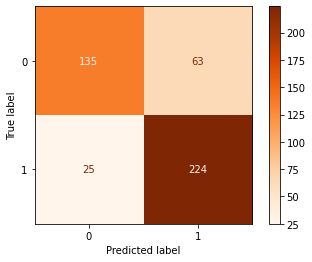

In [191]:
# Saving model perfomance metrics
scores.append(metrics(gs_knn_cv))

In [192]:
# Updating dataframe with metrics
results = pd.DataFrame(scores, index=['MNB_cvec', 'MNB_tvec', 'kNN_tvec', 'kNN_cvec'])
results

,train,test,recall,precision,f1_score
MNB_cvec,0.947722,0.932886,0.927711,0.950617,0.939024
MNB_tvec,0.952950,0.935123,0.931727,0.950820,0.941176
kNN_tvec,0.930545,0.796421,0.875502,0.784173,0.827324
kNN_cvec,0.875280,0.803132,0.899598,0.780488,0.835821


In [196]:
# Saving results
results.to_csv('./data/results.csv')

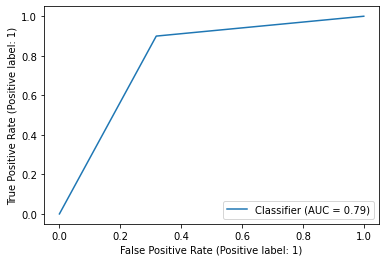

In [194]:
preds4 = gs_knn_cv.predict(X_test) # generating predictions to plot ROC curve
RocCurveDisplay.from_predictions(y_test, preds4);

KNN model with Count Vectorizer slightly improved perfomance compared to KNN with TF-IDF Vectorizer. KNN models in general prefer different parameters, like more primitive stop words lists and less data.

### Conclusions
Multinomial NB Models show a significantly better performance, and top model is utilizing TF-IDF Vectorizer which helped to reclassify one post compared to first model: Multinomial NB with Count Vectorizer.

During the project, I was able to create a classification model predicting if given post belongs to subreddit r/DunderMufflin with accuracy outperforming baseline score by 28% (94% vs 56%). To improve the model, I would dive deeper into preprocessing, experimenting with lemmatizing. Also, I would try other classification models.

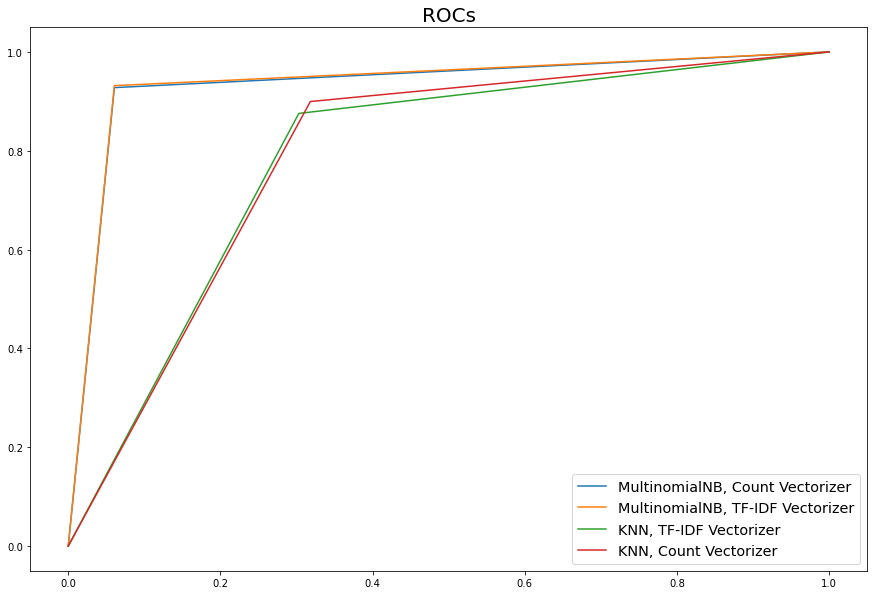

In [215]:
# Plotting ROC curves together
# source: https://www.statology.org/plot-multiple-roc-curves-python/
plt.figure(0, figsize = (15,10)).clf() #canvas

# KNN + TF-IDF
frp,trp, _ = roc_curve(y_test, preds)
auc = round(roc_auc_score(y_test, preds), 4)
plt.plot(frp, trp, label = 'MultinomialNB, Count Vectorizer')

# KNN + TF-IDF
frp,trp, _ = roc_curve(y_test, preds2)
auc = round(roc_auc_score(y_test, preds2), 4)
plt.plot(frp, trp, label = 'MultinomialNB, TF-IDF Vectorizer')

# KNN + TF-IDF
frp,trp, _ = roc_curve(y_test, preds3)
auc = round(roc_auc_score(y_test, preds3), 4)
plt.plot(frp, trp, label = 'KNN, TF-IDF Vectorizer')

# KNN + CV
frp,trp, _ = roc_curve(y_test, preds4)
auc = round(roc_auc_score(y_test, preds4), 4)
plt.plot(frp, trp, label = 'KNN, Count Vectorizer')

plt.title('ROCs', size = 20)
plt.legend(fontsize = 'x-large')
plt.savefig('./images/ROCs.png', dpi = 100);